### Create synthetic data

Before we apply our customized loss functions on real world stock price data, we will set up some synthetic time series data. The aim is to have **4 input series** and **1 target** series. In particular, we use:

- 2 **long wave sin** functions with similar base frequency but different amplitude to set the large scale trend. These series are highly correlated, on purpose. 
- Additionally, we add 1 **short wave sin** function for adding some small scale fluctuations. This feature is supposed to be linearly independent of the 2 long wave functions. 
- Ultimately, we add 1 **noise** series which is randomly drawn. 

The **target** series is the (weighted) **sum of all 4 series**.

In [1]:
# Import libraries:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Create some data:

# Set number of desired time steps:
n_steps = 1000

# Create linear space for time axis:
t_linspace = np.linspace(0, 10*np.pi, n_steps)

# Create (reproducible) random numbers, drawn from a normal distribution:
np.random.seed(1)
rand_normal_1 = np.random.normal(0, 0.1, n_steps)
np.random.seed(2)
rand_normal_2 = np.random.normal(0, 0.1, n_steps)
np.random.seed(3)
rand_normal_3 = np.random.normal(0, 0.1, n_steps)
np.random.seed(4)
rand_normal_4 = np.random.uniform(0, 1, (n_steps,4))

# Create two long wave sin series:
input_1 = 0.5*np.sin(t_linspace)+5*rand_normal_1
input_2 = np.sin(t_linspace+5*rand_normal_1)

# Create single short wave sin series:
input_3 = 0.5*np.sin(3*t_linspace)+5*rand_normal_2

# Create noise series:
input_4 = 3*rand_normal_3

# Stack inputs:
inputs = np.stack([input_1,input_2,input_3,input_4],axis=1)

# Create target, as weighted sum of all inputs, where weights are randomly drawn:

# target = 0.1*input_1 + 0.2*input_2 + input_3 + input_4
target = (
    (input_1*rand_normal_4[:,0]) + 
    (input_2*rand_normal_4[:,1]) + 
    (input_3*rand_normal_4[:,2]) + 
    (input_4*rand_normal_4[:,3])
)

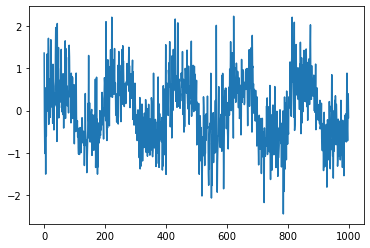

In [9]:
# Get familiar with inputs and target:
# plt.plot(input_1)
# plt.plot(input_2)
# plt.plot(input_3)
# plt.plot(input_4)
plt.plot(target)

In [11]:
# Check correlation of input series 1 and 2:
np.corrcoef(np.stack([input_1,input_2]))

array([[1.        , 0.54729807],
       [0.54729807, 1.        ]])

In [12]:
# Store input and target series:
np.save('../data/inputs.npy',inputs)
np.save('../data/target.npy',target)